In [1]:
import numpy as np
import pandas as pd
import re

# Processing

In [2]:
prob_df = pd.read_csv("liwc_test_prob.csv")

In [3]:
prob_df.columns

Index(['article_index', 'outlet', 'original_text', 'processed_text',
       'probability_0', 'probability_1', 'extremity_0', 'extremity_1', 'label',
       'Segment', 'WC', 'WPS', 'number', 'quantity', 'Drives', 'affiliation',
       'achieve', 'power', 'Cognition', 'cogproc', 'insight', 'cause',
       'discrep', 'tentat', 'certitude', 'differ', 'emo_pos', 'emo_neg',
       'emo_anx', 'emo_anger', 'emo_sad', 'Social', 'prosocial', 'polite',
       'socrefs', 'family', 'friend', 'female', 'male', 'politic', 'ethnicity',
       'Lifestyle', 'leisure', 'home', 'work', 'money', 'relig', 'Physical',
       'health', 'sexual', 'food', 'death', 'need', 'want', 'acquire', 'lack',
       'fulfill', 'fatigue', 'reward', 'risk', 'Perception', 'motion', 'space',
       'visual', 'auditory', 'feeling', 'time', 'focuspast', 'focuspresent',
       'focusfuture'],
      dtype='object')

In [4]:
prob_df.head(15)

,article_index,outlet,original_text,processed_text,probability_0,probability_1,extremity_0,extremity_1,label,Segment,...,Perception,motion,space,visual,auditory,feeling,time,focuspast,focuspresent,focusfuture
0,766,Daily Caller,Journalists were quick to take to Twitter and ...,journalists were quick to take to twitter and ...,0.999892,0.000108,0.499892,0.499892,0,1,...,7.52,0.33,4.58,1.63,0.65,0.00,4.58,4.90,1.96,0.33
1,1554,NYTimes,"In June, Josue, a 21-year-old Honduran, reache...","in june, josue, a 21 - year - old honduran, re...",0.000023,0.999977,0.499977,0.499977,1,1,...,12.89,3.58,9.79,0.24,0.00,0.00,4.06,3.10,2.63,0.48
2,1807,HuffPost,A Massachusetts county sheriff has proposed se...,a massachusetts county sheriff has proposed se...,0.000039,0.999961,0.499961,0.499961,1,1,...,8.66,0.50,8.17,0.25,0.00,0.00,3.22,2.72,2.72,1.73
3,255,FoxNews,We’ve got a question for all these people clai...,we ’ ve got a question for all these people cl...,0.999971,0.000029,0.499971,0.499971,0,1,...,11.14,1.94,7.02,1.45,0.00,0.00,4.36,4.60,2.91,0.24
4,920,CNN,President Donald Trump won the White House in ...,president donald trump won the white house in ...,0.000028,0.999972,0.499972,0.499972,1,1,...,11.62,1.21,9.20,0.48,0.24,0.00,3.87,3.39,5.33,0.48
5,492,Breitbart,Angel Mom Mary Ann Mendoza says Americans who ...,angel mom mary ann mendoza says americans who ...,0.999971,0.000029,0.499971,0.499971,0,1,...,8.17,0.74,6.44,0.50,0.25,0.00,3.71,2.97,3.47,1.49
6,698,Daily Caller,House Majority Leader Kevin McCarthy of Califo...,house majority leader kevin mccarthy of califo...,0.999964,0.000036,0.499964,0.499964,0,1,...,8.73,2.54,5.92,0.28,0.00,0.00,4.51,6.20,2.54,0.85
7,1193,CNN,President Donald Trump entered the White House...,president donald trump entered the white house...,0.000112,0.999888,0.499888,0.499888,1,1,...,9.98,1.75,7.23,0.75,0.00,0.00,4.49,3.24,2.99,1.25
8,412,Breitbart,The Texas Office of the Attorney General (OAG)...,the texas office of the attorney general ( oag...,0.999980,0.000020,0.499980,0.499980,0,1,...,6.76,0.24,6.04,0.00,0.00,0.24,2.90,2.90,1.93,1.21
9,677,Daily Caller,A Silicon Valley man who provided logistical s...,a silicon valley man who provided logistical s...,0.999929,0.000071,0.499929,0.499929,0,1,...,7.73,2.06,4.90,0.26,0.00,0.00,4.12,7.22,0.77,1.03


In [5]:
prob_df.dtypes[prob_df.dtypes != 'float64']

article_index      int64
outlet            object
original_text     object
processed_text    object
label              int64
Segment            int64
WC                 int64
dtype: object

In [6]:
prob_df["label"] = prob_df["label"].astype('category')

In [7]:
prob_df.dtypes[prob_df.dtypes != 'float64']

article_index        int64
outlet              object
original_text       object
processed_text      object
label             category
Segment              int64
WC                   int64
dtype: object

In [8]:
prob_df.drop(['article_index', 'Segment', 'extremity_1'], axis=1, inplace=True)

prob_df.rename(columns={"extremity_0": "Extremity"}, inplace=True)

In [9]:
affect_dict_path = 'only_affect_dict.txt'
with open(affect_dict_path, 'r') as file:
    affect_dict = file.readlines()
    # Remove newline characters
    affect_dict = [line.strip() for line in affect_dict]
    
affect_dict = [root.rstrip('*') for root in affect_dict]

In [10]:
moral_dict_path = 'only_moral_dict.txt'
with open(moral_dict_path, 'r') as file:
    moral_dict = file.readlines()
    # Remove newline characters
    moral_dict = [line.strip() for line in moral_dict]
    
moral_dict = [root.rstrip('*') for root in moral_dict]

In [11]:
me_dict_path = 'moral_emotional_dict.txt'
with open(me_dict_path, 'r') as file:
    me_dict = file.readlines()
    # Remove newline characters
    me_dict = [line.strip() for line in me_dict]
    
me_dict = [root.rstrip('*') for root in me_dict]

In [12]:
# Define the function to calculate percentages of words
def calculate_word_percentage(text, word_roots):
    text = text.lower()
    words = re.findall(r'\b\w+\b', text)
    found_words = [word for word in words if any(root in word for root in word_roots)]
    percentage = (len(found_words) / len(words)) * 100
    return percentage

# Apply the function to the DataFrame
prob_df['Moral_Percentage'] = prob_df['processed_text'].apply(lambda x: calculate_word_percentage(x, moral_dict))
prob_df['Affect_Percentage'] = prob_df['processed_text'].apply(lambda x: calculate_word_percentage(x, affect_dict))
prob_df['ME_Percentage'] = prob_df['processed_text'].apply(lambda x: calculate_word_percentage(x, me_dict))

In [13]:
prob_df.head(5)

,outlet,original_text,processed_text,probability_0,probability_1,Extremity,label,WC,WPS,number,...,visual,auditory,feeling,time,focuspast,focuspresent,focusfuture,Moral_Percentage,Affect_Percentage,ME_Percentage
0,Daily Caller,Journalists were quick to take to Twitter and ...,journalists were quick to take to twitter and ...,0.999892,0.000108,0.499892,0,306,16.11,0.65,...,1.63,0.65,0.0,4.58,4.90,1.96,0.33,5.882353,5.882353,1.633987
1,NYTimes,"In June, Josue, a 21-year-old Honduran, reache...","in june, josue, a 21 - year - old honduran, re...",0.000023,0.999977,0.499977,1,419,22.05,2.86,...,0.24,0.00,0.0,4.06,3.10,2.63,0.48,5.489260,9.785203,2.386635
2,HuffPost,A Massachusetts county sheriff has proposed se...,a massachusetts county sheriff has proposed se...,0.000039,0.999961,0.499961,1,404,19.24,2.72,...,0.25,0.00,0.0,3.22,2.72,2.72,1.73,5.693069,8.168317,0.990099
3,FoxNews,We’ve got a question for all these people clai...,we ’ ve got a question for all these people cl...,0.999971,0.000029,0.499971,0,413,19.67,1.94,...,1.45,0.00,0.0,4.36,4.60,2.91,0.24,4.842615,10.411622,2.179177
4,CNN,President Donald Trump won the White House in ...,president donald trump won the white house in ...,0.000028,0.999972,0.499972,1,413,20.65,2.66,...,0.48,0.24,0.0,3.87,3.39,5.33,0.48,4.358354,12.590799,0.726392


In [13]:
prob_df.describe()

,probability_0,probability_1,Extremity,WC,WPS,number,quantity,Drives,affiliation,achieve,...,visual,auditory,feeling,time,focuspast,focuspresent,focusfuture,Moral_Percentage,Affect_Percentage,ME_Percentage
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.393879,0.606121,0.489173,363.705556,19.409444,2.696667,4.342722,7.473222,1.564222,0.988167,...,0.578833,0.091722,0.110944,4.545889,4.361111,2.731111,0.921556,5.834889,9.140689,1.321941
std,0.481642,0.481642,0.051736,82.162239,4.907763,1.907998,2.039048,2.706096,1.226387,0.697725,...,0.482840,0.234094,0.292240,1.714850,1.849276,1.366588,0.792667,2.039960,2.064908,0.871181
min,0.000015,0.000018,0.093808,130.000000,8.330000,0.000000,0.000000,2.400000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.650000,0.000000,0.000000,0.925926,3.952569,0.000000
25%,0.000023,0.000139,0.499849,323.750000,15.737500,1.457500,2.775000,5.542500,0.620000,0.480000,...,0.240000,0.000000,0.000000,3.260000,3.022500,1.830000,0.305000,4.502077,7.881837,0.717752
50%,0.000161,0.999839,0.499969,404.500000,19.265000,2.275000,4.100000,7.395000,1.280000,0.940000,...,0.490000,0.000000,0.000000,4.200000,4.160000,2.560000,0.740000,5.656047,9.339564,1.182040
75%,0.999861,0.999977,0.499979,418.000000,22.332500,3.552500,5.680000,9.152500,2.185000,1.400000,...,0.932500,0.000000,0.230000,5.787500,5.295000,3.382500,1.372500,7.238235,10.538642,1.868248
max,0.999982,0.999985,0.499985,449.000000,35.500000,9.160000,12.130000,16.360000,5.820000,4.490000,...,2.330000,1.410000,3.090000,9.600000,10.780000,7.020000,4.480000,12.144703,14.713217,4.450262


In [14]:
from scipy.stats import zscore

/Users/sukaraca/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
selected_columns = prob_df.iloc[:, 7:74]

In [16]:
z_scores = selected_columns.apply(zscore)

In [17]:
# Add the z-scores back to the DataFrame
for i, col in enumerate(selected_columns.columns):
    prob_df[f'{col}_zscore'] = z_scores.iloc[:, i]

In [18]:
prob_df.columns[:70]

Index(['outlet', 'original_text', 'processed_text', 'probability_0',
       'probability_1', 'Extremity', 'label', 'WC', 'WPS', 'number',
       'quantity', 'Drives', 'affiliation', 'achieve', 'power', 'Cognition',
       'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certitude',
       'differ', 'emo_pos', 'emo_neg', 'emo_anx', 'emo_anger', 'emo_sad',
       'Social', 'prosocial', 'polite', 'socrefs', 'family', 'friend',
       'female', 'male', 'politic', 'ethnicity', 'Lifestyle', 'leisure',
       'home', 'work', 'money', 'relig', 'Physical', 'health', 'sexual',
       'food', 'death', 'need', 'want', 'acquire', 'lack', 'fulfill',
       'fatigue', 'reward', 'risk', 'Perception', 'motion', 'space', 'visual',
       'auditory', 'feeling', 'time', 'focuspast', 'focuspresent',
       'focusfuture', 'Moral_Percentage', 'Affect_Percentage',
       'ME_Percentage'],
      dtype='object')

In [19]:
columns_to_drop = ['outlet', 'original_text', 'processed_text' ,
'probability_0','probability_1',
                    'label','WC', 'WPS', 'number',
       'quantity', 'Drives', 'affiliation', 'achieve', 'power', 'Cognition',
       'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certitude',
       'differ', 'emo_pos', 'emo_neg', 'emo_anx', 'emo_anger', 'emo_sad',
       'Social', 'prosocial', 'polite', 'socrefs', 'family', 'friend',
       'female', 'male', 'politic', 'ethnicity', 'Lifestyle', 'leisure',
       'home', 'work', 'money', 'relig', 'Physical', 'health', 'sexual',
       'food', 'death', 'need', 'want', 'acquire', 'lack', 'fulfill',
       'fatigue', 'reward', 'risk', 'Perception', 'motion', 'space', 'visual',
       'auditory', 'feeling', 'time', 'focuspast', 'focuspresent',
       'focusfuture', 'Moral_Percentage', 'Affect_Percentage',
       'ME_Percentage']

In [20]:
reg_df = prob_df.drop(columns=columns_to_drop)

In [21]:
reg_df

,Extremity,WC_zscore,WPS_zscore,number_zscore,quantity_zscore,Drives_zscore,affiliation_zscore,achieve_zscore,power_zscore,Cognition_zscore,...,visual_zscore,auditory_zscore,feeling_zscore,time_zscore,focuspast_zscore,focuspresent_zscore,focusfuture_zscore,Moral_Percentage_zscore,Affect_Percentage_zscore,ME_Percentage_zscore
0,0.499892,-0.704296,-0.674166,-1.075670,-1.171806,-0.953551,-0.477706,-0.486022,-0.698865,0.005567,...,2.183123,2.391501,-0.380694,0.019947,0.292218,-0.565834,-0.748367,0.023332,-1.582358,0.359187
1,0.499977,0.674868,0.539537,0.085843,1.031426,-1.620571,-0.502236,-1.075285,-1.246609,-0.469588,...,-0.703708,-0.392912,-0.380694,-0.284132,-0.683851,-0.074194,-0.558605,-0.169902,0.312998,1.225537
2,0.499961,0.491793,-0.034622,0.012263,0.057676,0.991925,0.135553,1.066183,0.775209,0.718300,...,-0.682940,-0.392912,-0.380694,-0.775337,-0.889910,-0.008153,1.022750,-0.069715,-0.472217,-0.381973
3,0.499971,0.601638,0.053239,-0.397682,0.008497,-0.167949,1.296655,1.008694,-0.944544,1.145940,...,1.809288,-0.392912,-0.380694,-0.108702,0.129540,0.131267,-0.862225,-0.487775,0.617208,0.986738
4,0.499972,0.601638,0.253479,-0.019271,0.126527,-0.167949,-0.093397,0.663759,-0.356526,0.623269,...,-0.205263,0.635179,-0.380694,-0.395238,-0.526595,1.907039,-0.558605,-0.725825,1.675490,-0.685518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.499933,0.894558,-0.776330,0.385419,0.229804,-0.986902,-0.526766,2.848344,-1.464095,0.683744,...,-0.724477,-0.392912,0.408526,-0.518039,-0.504905,0.512838,0.567320,0.056417,1.450810,-0.204633
176,0.495781,0.284308,-1.240153,-0.061317,-0.866894,0.006217,0.200967,-0.672862,-0.038351,-0.987939,...,-1.202154,-0.392912,-0.380694,-0.845510,-0.542863,-0.485117,-0.836923,3.101734,-0.799911,3.534732
177,0.499833,0.601638,1.307808,1.252612,2.152714,-1.335235,-0.289640,-1.420219,-0.944544,0.830610,...,-0.205263,0.635179,-0.380694,-0.535583,2.493796,-1.651844,-0.862225,-1.916075,1.557903,1.822866
178,0.499985,0.662663,0.529321,-0.161175,0.451111,0.954868,0.871463,-0.730351,0.779237,-1.186640,...,-0.205263,-0.392912,-0.380694,-0.137940,-1.584003,1.679565,-0.862225,0.894964,0.324366,0.956734


In [22]:
reg_df.to_csv('regression_z.csv', index=False) 

In [23]:
reg_df.describe()

,Extremity,WC_zscore,WPS_zscore,number_zscore,quantity_zscore,Drives_zscore,affiliation_zscore,achieve_zscore,power_zscore,Cognition_zscore,...,visual_zscore,auditory_zscore,feeling_zscore,time_zscore,focuspast_zscore,focuspresent_zscore,focusfuture_zscore,Moral_Percentage_zscore,Affect_Percentage_zscore,ME_Percentage_zscore
count,180.000000,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,...,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02
mean,0.489173,-2.473330e-16,3.398516e-16,-8.758426e-17,5.551115e-17,-1.529641e-16,1.233581e-17,3.824102e-17,-2.004569e-16,4.194176e-16,...,7.586524e-17,-3.207311e-17,-1.665335e-17,3.145632e-16,2.238950e-16,-1.517305e-16,1.541976e-17,5.181041e-16,-1.279840e-16,-5.982869e-17
std,0.051736,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00,...,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00
min,0.093808,-2.852374e+00,-2.263832e+00,-1.417291e+00,-2.135720e+00,-1.879968e+00,-1.279030e+00,-1.420219e+00,-1.693664e+00,-2.469559e+00,...,-1.202154e+00,-3.929115e-01,-3.806938e-01,-2.658290e+00,-2.012389e+00,-2.004063e+00,-1.165845e+00,-2.413114e+00,-2.519527e+00,-1.521646e+00
25%,0.499849,-4.876572e-01,-7.502781e-01,-6.512708e-01,-7.709947e-01,-7.154617e-01,-7.720697e-01,-7.303506e-01,-8.206978e-01,-6.412915e-01,...,-7.037083e-01,-3.929115e-01,-3.806938e-01,-7.519467e-01,-7.258759e-01,-6.612266e-01,-7.799942e-01,-6.551748e-01,-6.113412e-01,-6.954633e-01
50%,0.499969,4.978958e-01,-2.951393e-02,-2.216160e-01,-1.193691e-01,-2.898656e-02,-2.324022e-01,-6.922641e-02,-1.027914e-01,-3.762845e-02,...,-1.844941e-01,-3.929115e-01,-3.806938e-01,-2.022648e-01,-1.090546e-01,-1.255597e-01,-2.296829e-01,-8.791395e-02,9.658036e-02,-1.610360e-01
75%,0.499979,6.626632e-01,5.972598e-01,4.498017e-01,6.576637e-01,6.222847e-01,5.075963e-01,5.918978e-01,5.567159e-01,6.437873e-01,...,7.345151e-01,-3.929115e-01,4.085262e-01,7.260545e-01,5.064111e-01,4.779829e-01,5.704823e-01,6.898470e-01,6.788931e-01,6.288377e-01
max,0.499985,1.041018e+00,3.287738e+00,3.396944e+00,3.829728e+00,3.293145e+00,3.479856e+00,5.032928e+00,3.630725e+00,2.744189e+00,...,3.636923e+00,5.647122e+00,1.022231e+01,2.955483e+00,3.480710e+00,3.147145e+00,4.501729e+00,3.101734e+00,2.706208e+00,3.600915e+00


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [25]:
X = reg_df.drop('Extremity', axis=1)
y = reg_df['Extremity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
reg_df.columns

Index(['Extremity', 'WC_zscore', 'WPS_zscore', 'number_zscore',
       'quantity_zscore', 'Drives_zscore', 'affiliation_zscore',
       'achieve_zscore', 'power_zscore', 'Cognition_zscore', 'cogproc_zscore',
       'insight_zscore', 'cause_zscore', 'discrep_zscore', 'tentat_zscore',
       'certitude_zscore', 'differ_zscore', 'emo_pos_zscore', 'emo_neg_zscore',
       'emo_anx_zscore', 'emo_anger_zscore', 'emo_sad_zscore', 'Social_zscore',
       'prosocial_zscore', 'polite_zscore', 'socrefs_zscore', 'family_zscore',
       'friend_zscore', 'female_zscore', 'male_zscore', 'politic_zscore',
       'ethnicity_zscore', 'Lifestyle_zscore', 'leisure_zscore', 'home_zscore',
       'work_zscore', 'money_zscore', 'relig_zscore', 'Physical_zscore',
       'health_zscore', 'sexual_zscore', 'food_zscore', 'death_zscore',
       'need_zscore', 'want_zscore', 'acquire_zscore', 'lack_zscore',
       'fulfill_zscore', 'fatigue_zscore', 'reward_zscore', 'risk_zscore',
       'Perception_zscore', 'moti

In [28]:
reg_col = [
       'WC_zscore', 'WPS_zscore', 'number_zscore', 'quantity_zscore',
       'Drives_zscore', 'affiliation_zscore', 'achieve_zscore', 'power_zscore',
       'Cognition_zscore', 'cogproc_zscore', 'insight_zscore', 'cause_zscore',
       'discrep_zscore', 'tentat_zscore', 'certitude_zscore', 'differ_zscore',
       'emo_pos_zscore', 'emo_neg_zscore', 'emo_anx_zscore',
       'emo_anger_zscore', 'emo_sad_zscore', 'Social_zscore',
       'prosocial_zscore', 'polite_zscore', 'socrefs_zscore', 'family_zscore',
       'friend_zscore', 'female_zscore', 'male_zscore', 'politic_zscore',
       'ethnicity_zscore', 'Lifestyle_zscore', 'leisure_zscore', 'home_zscore',
       'work_zscore', 'money_zscore', 'relig_zscore', 'Physical_zscore',
       'health_zscore', 'sexual_zscore', 'food_zscore', 'death_zscore',
       'need_zscore', 'want_zscore', 'acquire_zscore', 'lack_zscore',
       'fulfill_zscore', 'fatigue_zscore', 'reward_zscore', 'risk_zscore',
       'Perception_zscore', 'motion_zscore', 'space_zscore', 'visual_zscore',
       'auditory_zscore', 'feeling_zscore', 'time_zscore', 'focuspast_zscore',
       'focuspresent_zscore', 'focusfuture_zscore', 'Moral_Percentage_zscore',
       'Affect_Percentage_zscore', 'ME_Percentage_zscore']

In [29]:
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge model
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Mean Squared Error: {ridge_mse}")

Ridge Mean Squared Error: 0.005100645059310741


In [30]:
# Access the coefficients
ridge_coefficients = ridge_model.coef_
print("Ridge Coefficients:", ridge_coefficients)

Ridge Coefficients: [-0.00836993 -0.00526583 -0.01016236  0.01366251  0.00781387 -0.00010621
  0.00941316 -0.01046025  0.00895734 -0.01347942  0.01244427  0.00060837
  0.01274115 -0.00319474 -0.00708644 -0.00283464  0.00169445 -0.01385498
  0.00127661  0.00040702  0.01034872  0.00738853 -0.00252584 -0.00021014
 -0.01060425 -0.0036937  -0.00897507  0.00333792  0.00943742 -0.00607675
 -0.00282938  0.00122876 -0.00627906  0.010881    0.0054172   0.00383995
  0.00632511 -0.01778152  0.01599379  0.00408195  0.00046155  0.01834802
  0.00851482 -0.00615363  0.00081332  0.00072898 -0.01312937 -0.00225948
 -0.00091132 -0.0077569   0.01061994 -0.0034403  -0.01101928 -0.01185893
  0.00142963  0.00015074  0.00202484  0.0026184  -0.00228085 -0.01758792
  0.00813463  0.00834362 -0.00029688]


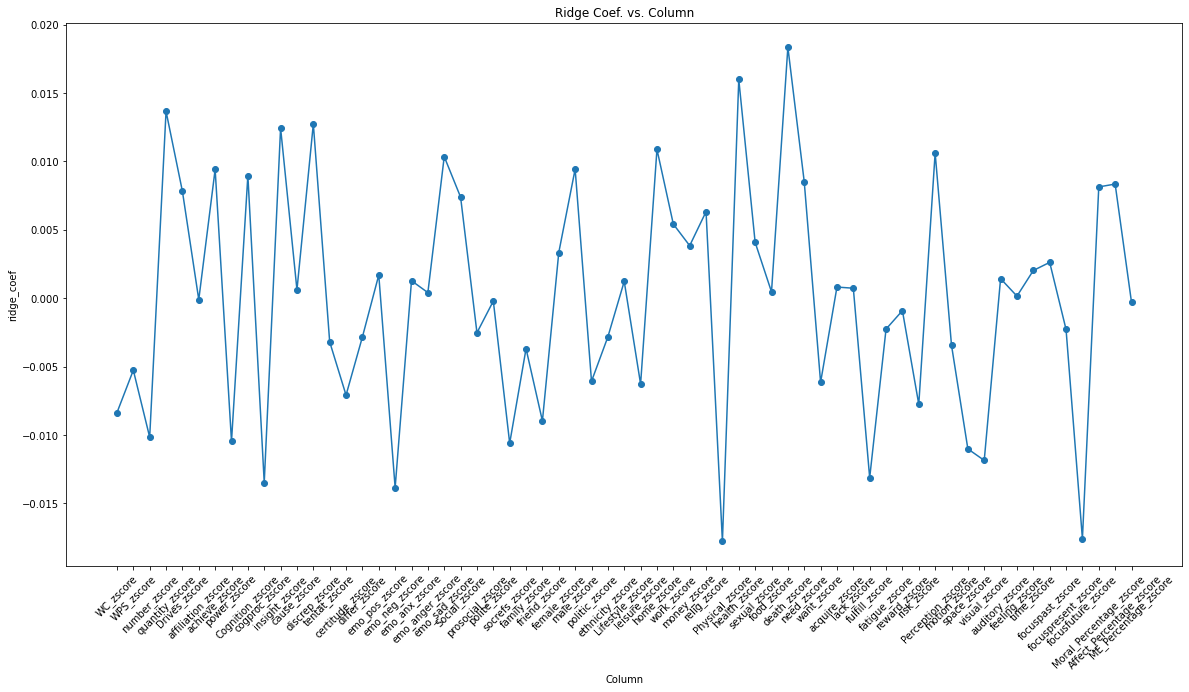

In [31]:
# Select the "Column" and "ridge_coef" columns
x = reg_col
y = ridge_coefficients

plt.figure(figsize=(20, 10))
# Create the plot
plt.plot(x, y, marker='o', linestyle='-')

# Customize the plot
plt.title('Ridge Coef. vs. Column')
plt.xlabel('Column')
plt.ylabel('ridge_coef')

plt.xticks(rotation=45)
# Display the plot
plt.show()

In [33]:
lasso_model = Lasso(alpha=0.001)  # You can adjust the alpha parameter for regularization strength
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Lasso model
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Mean Squared Error: {lasso_mse}")

Lasso Mean Squared Error: 0.0030377417896237566


In [34]:
lasso_coefficients = lasso_model.coef_
print("Lasso Coefficients:", lasso_coefficients)

Lasso Coefficients: [-5.32937406e-03 -2.27568095e-03 -3.81945372e-03  5.45265600e-03
 -0.00000000e+00  0.00000000e+00  5.40122915e-03 -2.11524506e-04
  0.00000000e+00  0.00000000e+00  6.72828939e-03  2.83003880e-04
  6.67735170e-03 -2.32781196e-03 -3.12191248e-03 -4.80959502e-03
  0.00000000e+00 -4.76915648e-03 -0.00000000e+00 -4.54792147e-03
  2.22421193e-03  0.00000000e+00 -1.33056326e-03 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -5.28408824e-03  2.07351742e-03
  5.83094367e-03 -1.27865449e-03 -3.93105851e-05  1.69525879e-03
 -1.95174706e-03  2.07996623e-03  0.00000000e+00  2.80439097e-03
  2.79135861e-03 -0.00000000e+00  8.90836595e-04  9.60842909e-04
  0.00000000e+00  2.12555883e-03  6.77752086e-03 -3.96546209e-03
  0.00000000e+00 -1.44342199e-04 -7.27161941e-03 -1.17102926e-04
 -0.00000000e+00 -3.25823669e-03 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -4.70474607e-03  6.65303818e-06  0.00000000e+00
  1.61604384e-03  4.82093607e-04  0.00000000e+00 -1.23882449e-02
 -7.0

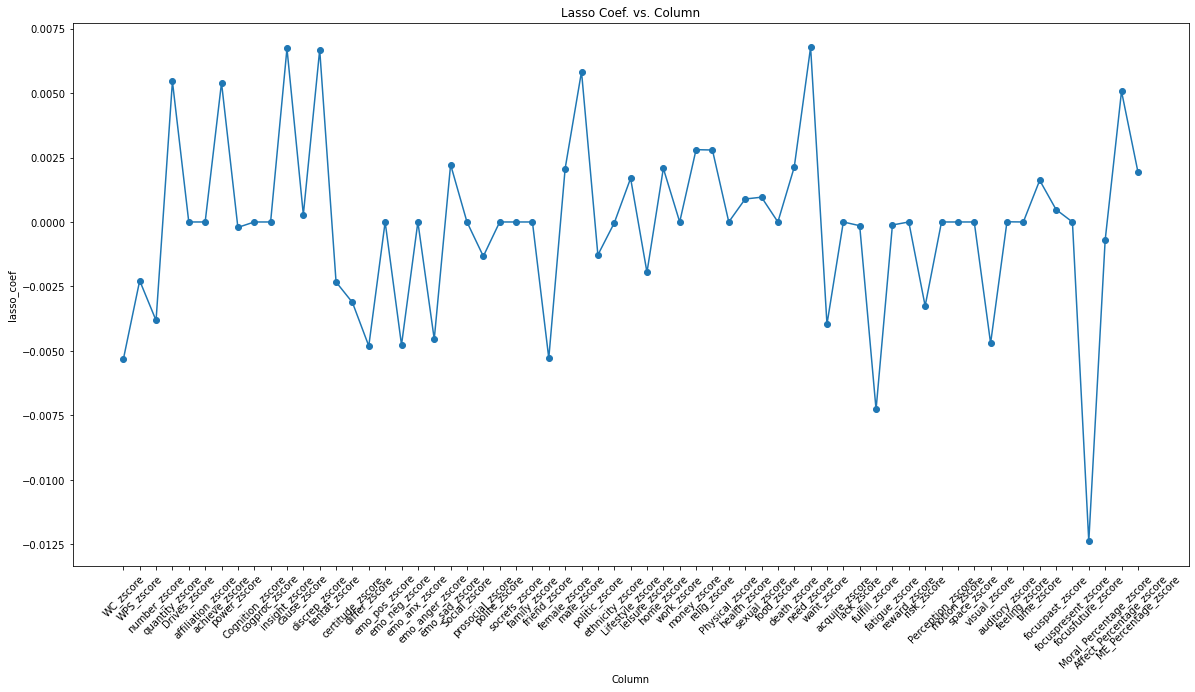

In [35]:
# Select the "Column" and "ridge_mse" columns
x = reg_col
y = lasso_coefficients

plt.figure(figsize=(20, 10))
# Create the plot
plt.plot(x, y, marker='o', linestyle='-')

# Customize the plot
plt.title('Lasso Coef. vs. Column')
plt.xlabel('Column')
plt.ylabel('lasso_coef')

plt.xticks(rotation=45)
# Display the plot
plt.show()

In [32]:
reg_df

,Extremity,WC_zscore,WPS_zscore,number_zscore,quantity_zscore,Drives_zscore,affiliation_zscore,achieve_zscore,power_zscore,Cognition_zscore,...,visual_zscore,auditory_zscore,feeling_zscore,time_zscore,focuspast_zscore,focuspresent_zscore,focusfuture_zscore,Moral_Percentage_zscore,Affect_Percentage_zscore,ME_Percentage_zscore
0,0.499892,-0.704296,-0.674166,-1.075670,-1.171806,-0.953551,-0.477706,-0.486022,-0.698865,0.005567,...,2.183123,2.391501,-0.380694,0.019947,0.292218,-0.565834,-0.748367,0.023332,-1.582358,0.359187
1,0.499977,0.674868,0.539537,0.085843,1.031426,-1.620571,-0.502236,-1.075285,-1.246609,-0.469588,...,-0.703708,-0.392912,-0.380694,-0.284132,-0.683851,-0.074194,-0.558605,-0.169902,0.312998,1.225537
2,0.499961,0.491793,-0.034622,0.012263,0.057676,0.991925,0.135553,1.066183,0.775209,0.718300,...,-0.682940,-0.392912,-0.380694,-0.775337,-0.889910,-0.008153,1.022750,-0.069715,-0.472217,-0.381973
3,0.499971,0.601638,0.053239,-0.397682,0.008497,-0.167949,1.296655,1.008694,-0.944544,1.145940,...,1.809288,-0.392912,-0.380694,-0.108702,0.129540,0.131267,-0.862225,-0.487775,0.617208,0.986738
4,0.499972,0.601638,0.253479,-0.019271,0.126527,-0.167949,-0.093397,0.663759,-0.356526,0.623269,...,-0.205263,0.635179,-0.380694,-0.395238,-0.526595,1.907039,-0.558605,-0.725825,1.675490,-0.685518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.499933,0.894558,-0.776330,0.385419,0.229804,-0.986902,-0.526766,2.848344,-1.464095,0.683744,...,-0.724477,-0.392912,0.408526,-0.518039,-0.504905,0.512838,0.567320,0.056417,1.450810,-0.204633
176,0.495781,0.284308,-1.240153,-0.061317,-0.866894,0.006217,0.200967,-0.672862,-0.038351,-0.987939,...,-1.202154,-0.392912,-0.380694,-0.845510,-0.542863,-0.485117,-0.836923,3.101734,-0.799911,3.534732
177,0.499833,0.601638,1.307808,1.252612,2.152714,-1.335235,-0.289640,-1.420219,-0.944544,0.830610,...,-0.205263,0.635179,-0.380694,-0.535583,2.493796,-1.651844,-0.862225,-1.916075,1.557903,1.822866
178,0.499985,0.662663,0.529321,-0.161175,0.451111,0.954868,0.871463,-0.730351,0.779237,-1.186640,...,-0.205263,-0.392912,-0.380694,-0.137940,-1.584003,1.679565,-0.862225,0.894964,0.324366,0.956734


In [ ]:
reg_extremity

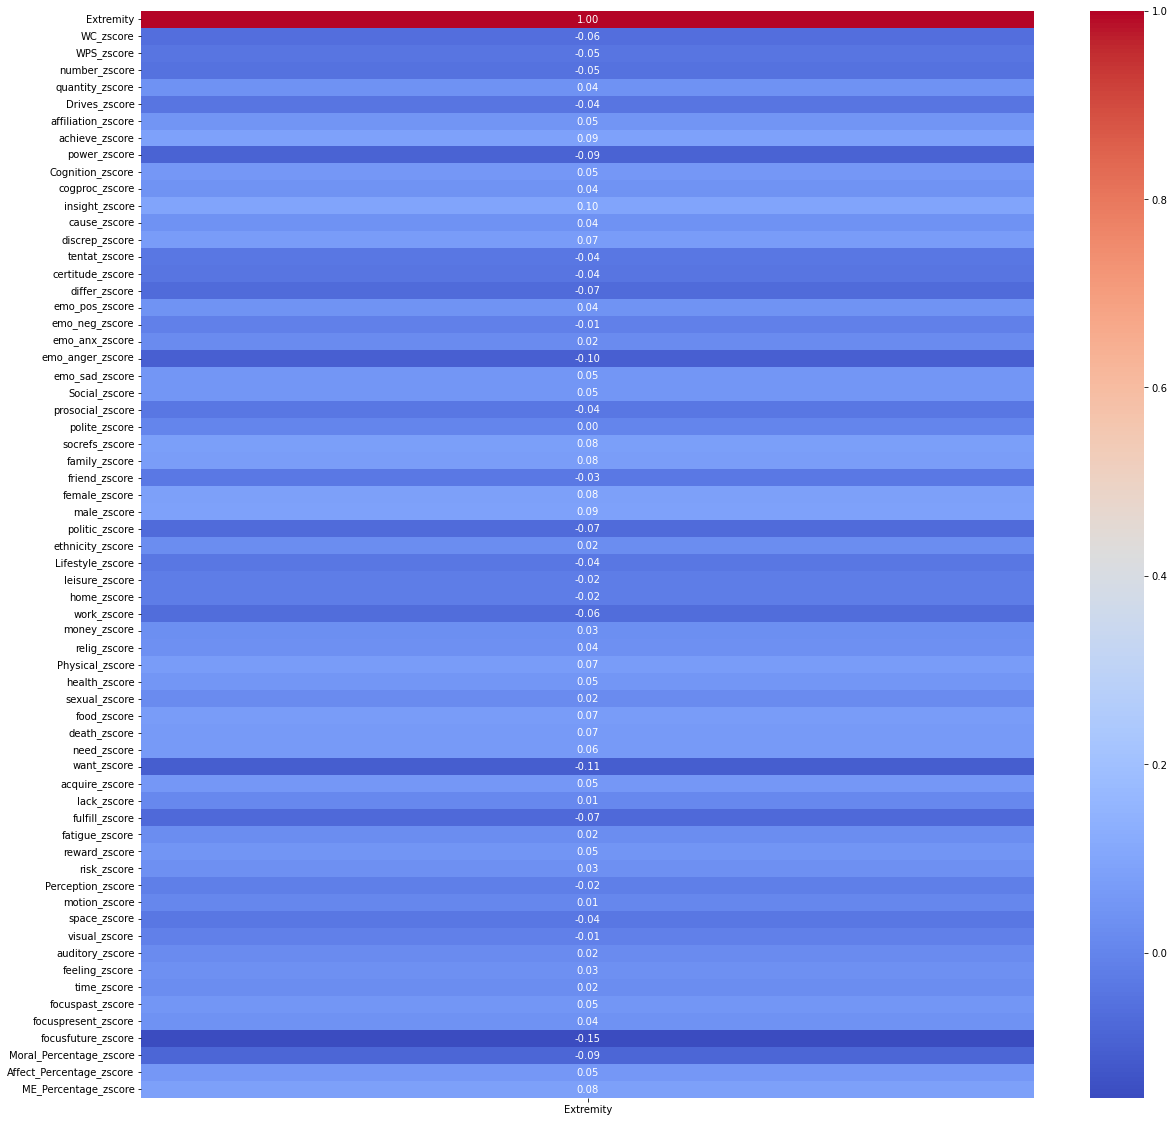

In [36]:
# Calculate the correlation matrix
corr_matrix = reg_df.corr()

# Extract the correlation of each variable with the "Extremity" column
extremity_correlations = corr_matrix['Extremity']

# Create a figure and axis
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed

# Create a heatmap for the extracted correlations
sns.heatmap(extremity_correlations.to_frame(), cmap='coolwarm', annot=True, fmt=".2f")

# Show the plot
plt.show()

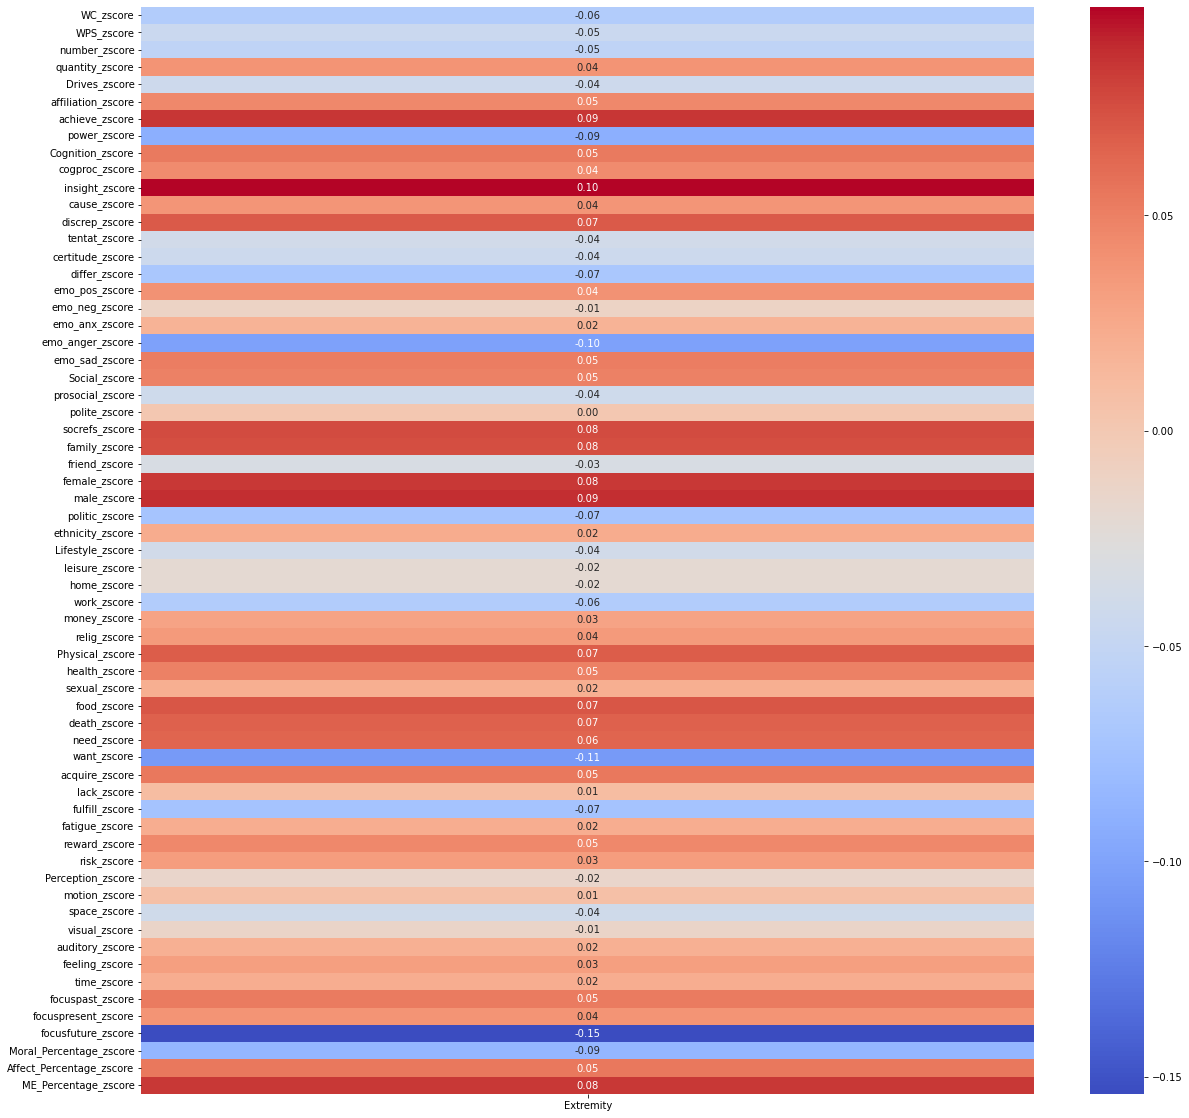

In [34]:
# Calculate the correlation matrix excluding the "Extremity" column
corr_matrix = reg_df.corr()

# Extract the correlation of each variable with the "Extremity" column
extremity_correlations = corr_matrix['Extremity']

# Create a figure and axis
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed

# Create a heatmap for the extracted correlations, excluding the "Extremity" column
sns.heatmap(extremity_correlations.drop(index=['Extremity']).to_frame(), cmap='coolwarm', annot=True, fmt=".2f")

# Show the plot
plt.show()

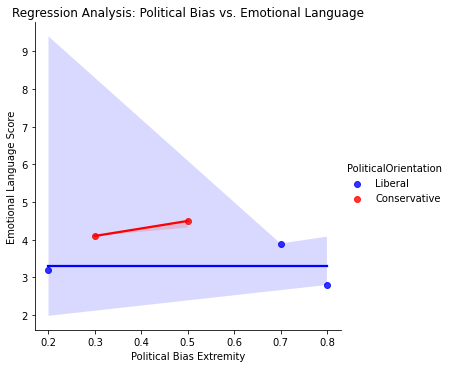

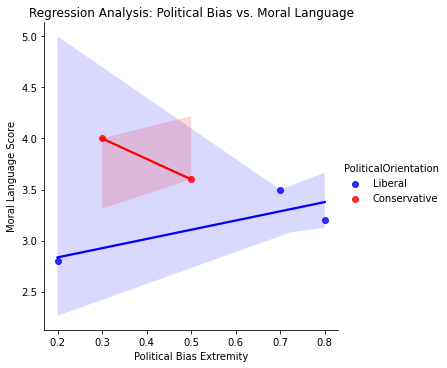

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming you have a DataFrame called 'data' with columns: 
# 'PoliticalBiasExtremity', 'EmotionalLanguageScore', 'MoralLanguageScore', 'PoliticalOrientation'

# Example data preparation (replace it with your actual data)
data = pd.DataFrame({
    'PoliticalBiasExtremity': [0.2, 0.5, 0.8, 0.3, 0.7],
    'EmotionalLanguageScore': [3.2, 4.5, 2.8, 4.1, 3.9],
    'MoralLanguageScore': [2.8, 3.6, 3.2, 4.0, 3.5],
    'PoliticalOrientation': ['Liberal', 'Conservative', 'Liberal', 'Conservative', 'Liberal']
})

# Scatter plot with regression line for Emotional Language Score
sns.lmplot(x='PoliticalBiasExtremity', y='EmotionalLanguageScore', hue='PoliticalOrientation', data=data, palette={'Liberal': 'blue', 'Conservative': 'red'})
plt.title('Regression Analysis: Political Bias vs. Emotional Language')
plt.xlabel('Political Bias Extremity')
plt.ylabel('Emotional Language Score')
plt.show()

# Scatter plot with regression line for Moral Language Score
sns.lmplot(x='PoliticalBiasExtremity', y='MoralLanguageScore', hue='PoliticalOrientation', data=data, palette={'Liberal': 'blue', 'Conservative': 'red'})
plt.title('Regression Analysis: Political Bias vs. Moral Language')
plt.xlabel('Political Bias Extremity')
plt.ylabel('Moral Language Score')
plt.show()
